テキスト読み込んで整形

In [77]:
import glob

#ファイルを読み込む関数。listから改行を消す。
def read_file(file_path):
  with open(file_path, "r") as file:
    return "".join([line.strip() for line in file if line.strip()])

# ファイルパス
file_paths = sorted(glob.glob("/content/*.txt"))

# 実行結果をllistに渡す
data_sets = [read_file(file_path) for file_path in file_paths]

# 確認用
print(file_paths)
print(data_sets[0])


['/content/A01F0055.txt', '/content/A01F0067.txt', '/content/A01F0122.txt', '/content/A01M0007.txt', '/content/A01M0015.txt', '/content/A01M0020.txt', '/content/S00F0014.txt', '/content/S00F0031.txt', '/content/S00F0041.txt', '/content/S00M0025.txt', '/content/S00M0053.txt', '/content/S00M0065.txt']
(F えーっと)(R ××××××××××××××××××××)ということで(F えー)(D す)発表します(F えー)私共は乳児が音楽をどのように聞いているかまた聴取に発達齢差が見られるかを検討しております本研究では旋律の調つまり長調ですとか短調の変化の(D ひきわけん)聞き分けに着目して実験を通して(F えー)知見を得ましたので報告したいと思います(F え)長調短調の違いは(F え)成人の場合は比較的容易に(F あの)普段から聞き分けていられると(D い)言われていますまた海外の(F えー)研究では四五歳児幼児は(F え)両者の弁別が可能であるという報告もありますではいつ頃から可能なのでしょうかあるいは人間の発達の初期の(F え)段階から見られるような(F えー)傾向なのでしょうか(F え)ゼロ歳児を対象とした研究にはコーエンらの(F えー)報告が(F えー)挙げられます彼らは七から十一か月児を対象として長三和音例えばドミソミドの(F えー)分散和音型をずっと聞かせ続けてでその後に短三和音例えばレファラファレというような(F え)分散和音を聞かせると(F え)その変化に気付いて音源の方向を振り向く率が(F え)変化しなかった場合に比べて有意に高かったことから七から十一か月児は長三和音と短三和音を弁別しているという風に報告しております(F え)ただし(F えー)<FV>私達が日常耳にするような音楽の旋律の形態を素材とした聴取反応については(F えー)まだゼロ歳児で(F え)そういうことが可能であるとか(F あのー)そういうことに関してはまだ報告されておりませんで長調短調の(

In [30]:
# python3で動作するMeCabライブラリ
!pip install mecab-python3
# UniDicは国立国語研究所が開発している辞書
!pip install unidic
!python -m unidic download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:34<00:00, 15.3MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir


In [31]:
import MeCab
import unidic

形態素解析

In [82]:
import MeCab
import pandas as pd

def make_word_list(word_type, data):
    mecab = MeCab.Tagger()
    node = mecab.parseToNode(data)
    word_list = []

    while node:
        word_pos = node.feature.split(',')[0]

        if word_pos in word_type and node.surface != 'ー':
            word_list.append(node.surface)

        node = node.next

    return word_list

#話者
titles = [
    "A_F1", "A_F2", "A_F3",
    "A_M1", "A_M2", "A_M3",
    "S_F1", "S_F2", "S_F3",
    "S_M1", "S_M2", "S_M3"
]

#品詞
pos_types = ["名詞", "動詞", "形容詞", "副詞", "感動詞"]
#品詞をkeyとしたからの辞書の作成
pos_counts = {pos: [] for pos in pos_types}

# 辞書に値入れる
for data in data_sets:
    for pos in pos_types:
        pos_counts[pos].append(len(make_word_list(pos, data)))

#データフレームに変更
df = pd.DataFrame(pos_counts, index=titles)

print(df)


        名詞   動詞  形容詞   副詞   感動詞
A_F1   771  294   14   36   639
A_F2  1100  334   34   42   720
A_F3   858  190   89   27   268
A_M1  1643  572   37  121  1112
A_M2   874  410   30   66   675
A_M3   654  173   20   16   623
S_F1   960  582   74  255  1190
S_F2   427  278   40   51   344
S_F3   366  159   19   38   297
S_M1   320  209   44   77   398
S_M2   465  262   37   89   598
S_M3   477  260   40   83   512


感動詞を抜く

In [96]:
#感動詞の削除
df_fin = df.drop("感動詞", axis=1)
print(df_fin)

        名詞   動詞  形容詞   副詞
A_F1   771  294   14   36
A_F2  1100  334   34   42
A_F3   858  190   89   27
A_M1  1643  572   37  121
A_M2   874  410   30   66
A_M3   654  173   20   16
S_F1   960  582   74  255
S_F2   427  278   40   51
S_F3   366  159   19   38
S_M1   320  209   44   77
S_M2   465  262   37   89
S_M3   477  260   40   83


割合

In [100]:
row_sums = df_fin.sum(axis=1)  # 行ごとの合計を計算
row_percents = df_fin.div(row_sums, axis=0) * 100  # 行ごとの割合を計算

print(row_percents)

             名詞         動詞       形容詞         副詞
A_F1  69.147982  26.367713  1.255605   3.228700
A_F2  72.847682  22.119205  2.251656   2.781457
A_F3  73.711340  16.323024  7.646048   2.319588
A_M1  69.237252  24.104509  1.559208   5.099031
A_M2  63.333333  29.710145  2.173913   4.782609
A_M3  75.782155  20.046350  2.317497   1.853998
S_F1  51.309460  31.106360  3.955104  13.629075
S_F2  53.643216  34.924623  5.025126   6.407035
S_F3  62.886598  27.319588  3.264605   6.529210
S_M1  49.230769  32.153846  6.769231  11.846154
S_M2  54.513482  30.715123  4.337632  10.433763
S_M3  55.465116  30.232558  4.651163   9.651163


グラフ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


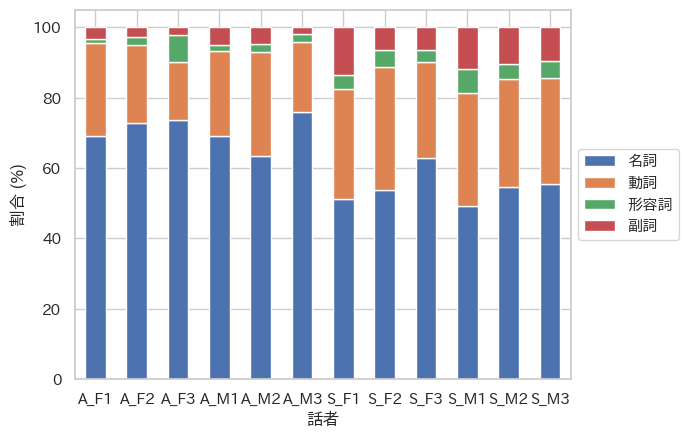

In [101]:
!pip install japanize-matplotlib
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt


row_percents.plot(kind='bar', stacked=True)

# グラフの設定
plt.xlabel('話者')
plt.ylabel('割合 (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)

# グラフの表示
plt.show()
